In [2]:
import pandas as pd 
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx

In [3]:
df = pd.read_csv("./timetable.csv", index_col=[0]) 
print(df)

              DeparturePort     DepartureTime         ArrivalPort  \
0                  GUSTAVIA  2019-12-05 19:59            GUSTAVIA   
1                  GUSTAVIA  2019-12-06 12:52            GUSTAVIA   
2             FREEPORT (TX)  2019-12-05 20:10             HOUSTON   
3                     KAWAU  2019-12-06 20:05               KAWAU   
4                     KAWAU  2019-12-07 22:17               KAWAU   
5      CONCEPTION D URUGUAY  2019-12-05 19:53             ROSARIO   
6                   JAKARTA  2019-12-07 08:12            SEMARANG   
7                   HALIFAX  2019-12-05 15:43             HALIFAX   
8                   BANGKOK  2019-12-06 14:53             BANGKOK   
9                PYEONGTAEK  2019-12-06 04:48          PYEONGTAEK   
10               PORT QASIM  2019-12-06 09:12          PORT QASIM   
11               PORT QASIM  2019-12-06 10:08          PORT QASIM   
12               PORT QASIM  2019-12-08 06:54          PORT QASIM   
13                  KOBLENZ  2019-

In [4]:
#define nodes
arrival_nodes = df.ArrivalPort.tolist()
departure_nodes = df.DeparturePort.tolist()

nodes = set(np.concatenate((arrival_nodes, departure_nodes)))
len(nodes)



3565

In [5]:
#define edges
edges = []
for i in df.index:
    edge = (df['DeparturePort'][i], df['ArrivalPort'][i])
    edges.append(edge)
    
edges

[('GUSTAVIA', 'GUSTAVIA'),
 ('GUSTAVIA', 'GUSTAVIA'),
 ('FREEPORT (TX)', 'HOUSTON'),
 ('KAWAU', 'KAWAU'),
 ('KAWAU', 'KAWAU'),
 ('CONCEPTION D URUGUAY', 'ROSARIO'),
 ('JAKARTA', 'SEMARANG'),
 ('HALIFAX', 'HALIFAX'),
 ('BANGKOK', 'BANGKOK'),
 ('PYEONGTAEK', 'PYEONGTAEK'),
 ('PORT QASIM', 'PORT QASIM'),
 ('PORT QASIM', 'PORT QASIM'),
 ('PORT QASIM', 'PORT QASIM'),
 ('KOBLENZ', 'KOELN'),
 ('KOELN', 'DUISBURG'),
 ('SALTEN', 'STOKMARKNES'),
 ('STOKMARKNES', 'TROMSO'),
 ('HONG KONG', 'HONG KONG'),
 ('SOUTHPORT', 'SOUTHPORT'),
 ('HELSINGBORG', 'LANDSKRONA'),
 ('LANDSKRONA', 'HELSINGBORG'),
 ('HELSINGBORG', 'HELSINGBORG'),
 ('HELSINGBORG', 'MALMO'),
 ('MALMO', 'MALMO'),
 ('MALMO', 'MALMO'),
 ('MALMO', 'MALMO'),
 ('MALMO', 'MALMO'),
 ('MALMO', 'MALMO'),
 ('MALMO', 'MALMO'),
 ('DORDRECHT', 'BOTLEK - ROTTERDAM'),
 ('BOTLEK - ROTTERDAM', 'HANSWEERT'),
 ('STOCKHOLM', 'BROFJORDEN'),
 ('ANTWERP', 'GENT'),
 ('HELSINKI', 'HELSINKI'),
 ('SAN FRANCISCO', 'SAN FRANCISCO'),
 ('SAN FRANCISCO', 'SAN FRANCISC

In [6]:
graph =nx.Graph()

graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

print(type(graph.nodes()))
print(type(graph.edges()))

<class 'networkx.classes.reportviews.NodeView'>
<class 'networkx.classes.reportviews.EdgeView'>


C:\Users\Tabea\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


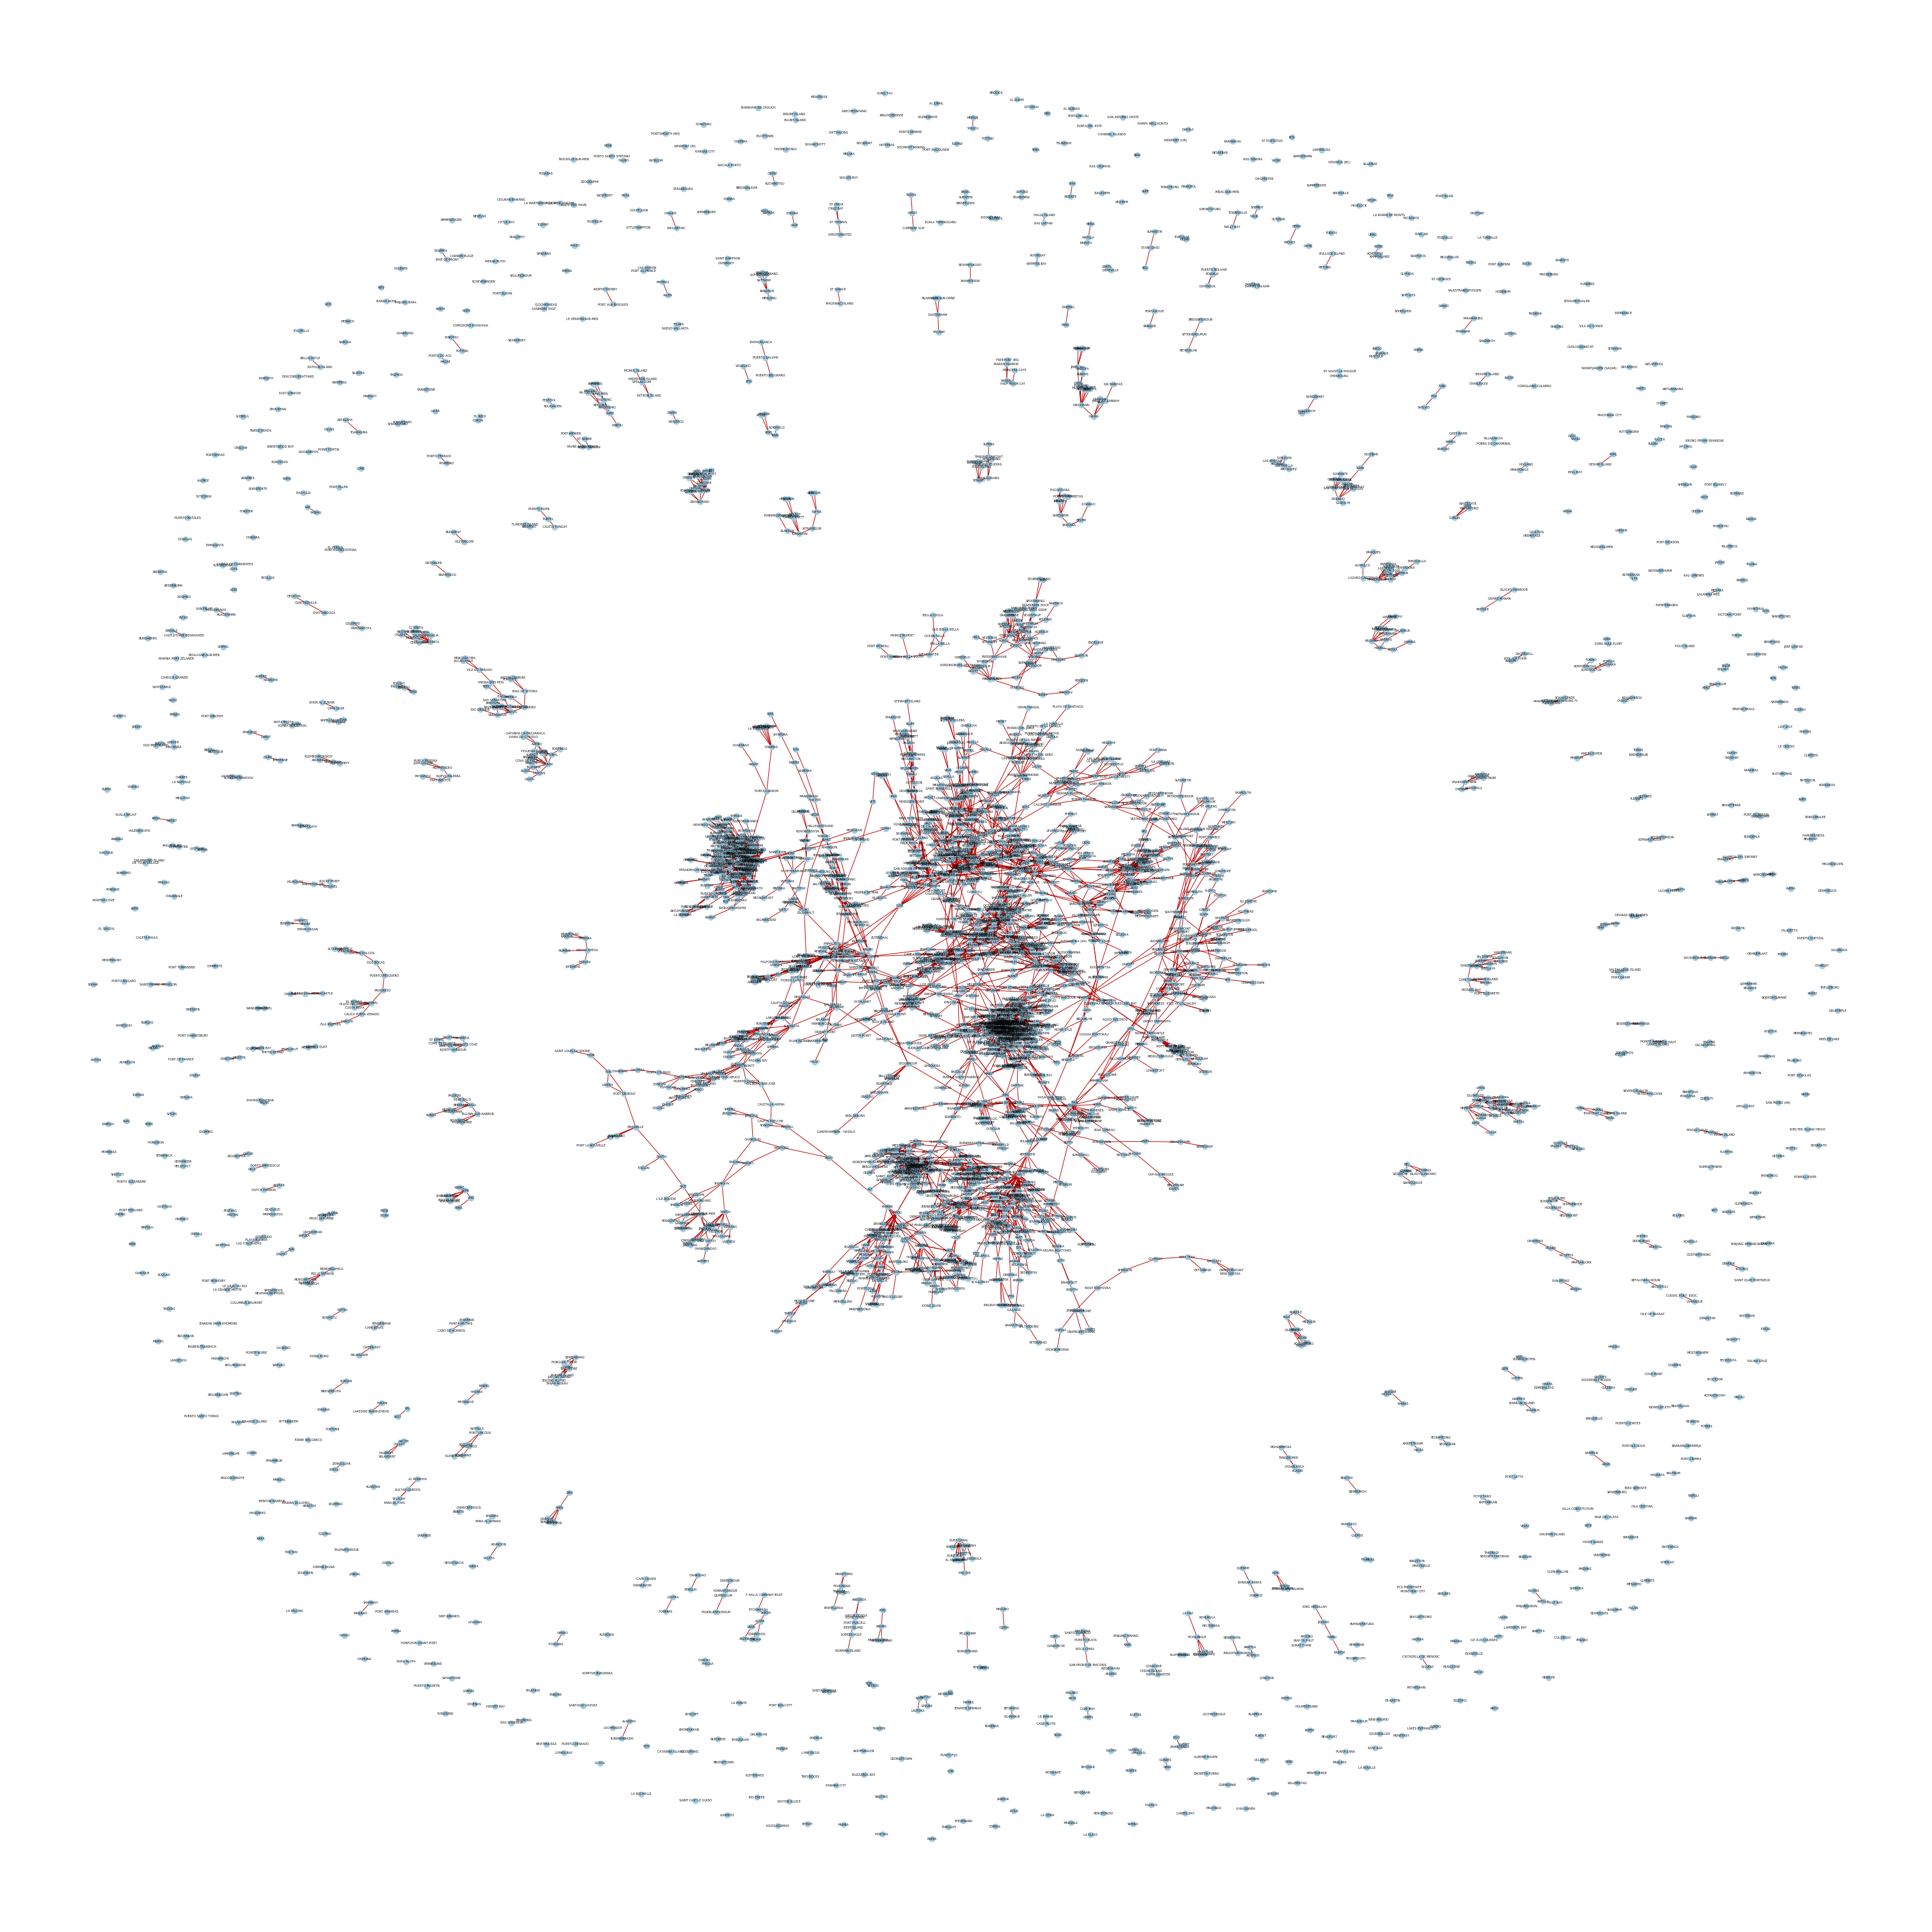

In [7]:
#overview whole network
pos=nx.spring_layout(graph)
plt.figure(1, figsize=(45,45))
nx.draw(graph,pos,node_color='#A0CBE2',edge_color='#BB0000',width=1,node_size=80,font_size=5,with_labels=True)
plt.savefig("graph_orig.pdf")
plt.show() 

In [8]:
#Degree centrality with self-loop
all_degree_centrality = nx.degree_centrality(graph)

centrality_dict = {k: v for k, v in sorted(all_degree_centrality.items(), key=lambda item: item[1])}

for x in centrality_dict:
    print(x, centrality_dict.get(x))

BAYBAY 0.0002805836139169473
TASUCU 0.0002805836139169473
WEITOU 0.0002805836139169473
NAOUSA 0.0002805836139169473
YTTEROY 0.0002805836139169473
MIIDURANNA 0.0002805836139169473
MEHRUM 0.0002805836139169473
FANO 0.0002805836139169473
FOINIKAS 0.0002805836139169473
UITHOORN 0.0002805836139169473
OLBIA 0.0002805836139169473
POHANG 0.0002805836139169473
HASSA 0.0002805836139169473
HUANGPU 0.0002805836139169473
WINNINGEN 0.0002805836139169473
ZIRA 0.0002805836139169473
BEEF ISLAND 0.0002805836139169473
AFTAB 0.0002805836139169473
PUNTA LANGOSTEIRA 0.0002805836139169473
SEHNDE 0.0002805836139169473
BURGSTAAKEN 0.0002805836139169473
CORINTHOS 0.0002805836139169473
JAFRABAD 0.0002805836139169473
LA PAZ 0.0002805836139169473
ORZOLA 0.0002805836139169473
ALF 0.0002805836139169473
PORT LA NOUVELLE 0.0002805836139169473
SALEM 0.0002805836139169473
WESSEM 0.0002805836139169473
NANAO 0.0002805836139169473
SIRACUSA 0.0002805836139169473
NEA ARTAKI 0.0002805836139169473
HELGUVIK 0.000280583613916947

SKAGASTROND 0.0005611672278338945
GUDVANGEN 0.0005611672278338945
CIBOURE 0.0005611672278338945
DAVAO 0.0005611672278338945
MARKNESSE 0.0005611672278338945
KOS 0.0005611672278338945
SALINA CRUZ 0.0005611672278338945
VLIELAND 0.0005611672278338945
GYEKPO 0.0005611672278338945
SUCRE 0.0005611672278338945
KINSARVIK 0.0005611672278338945
NESSEBAR 0.0005611672278338945
NEVELSK 0.0005611672278338945
MUKHO 0.0005611672278338945
AL RUWAIS 0.0005611672278338945
LAVAN 0.0005611672278338945
HOUT BAY 0.0005611672278338945
MURFATLAR 0.0005611672278338945
VOZNESENYE 0.0005611672278338945
SAN ANTONIO OESTE 0.0005611672278338945
FOTO 0.0005611672278338945
LICATA 0.0005611672278338945
PUERTO SANTO TOMAS 0.0005611672278338945
VASTO 0.0005611672278338945
KIEV 0.0005611672278338945
KRONG PREAH SIHANOUK 0.0005611672278338945
HOERNUM 0.0005611672278338945
LESE 0.0005611672278338945
AUHAFEN 0.0005611672278338945
TORRE ANNUNZIATA 0.0005611672278338945
VRSAR 0.0005611672278338945
CARRICKFERGUS 0.00056116722783

RABIGH 0.0008417508417508418
ASTAKOS 0.0008417508417508418
OTTERSOYA 0.0008417508417508418
UTAAKER 0.0008417508417508418
LAS MAREAS 0.0008417508417508418
SALALAH 0.0008417508417508418
FEJAN 0.0008417508417508418
KAFUKA 0.0008417508417508418
PORTSMOUTH ANCH 0.0008417508417508418
GEELONG 0.0008417508417508418
YAMBA 0.0008417508417508418
BURRIANA 0.0008417508417508418
ISHIKARIWANSHIN 0.0008417508417508418
SMOGEN 0.0008417508417508418
SAN NICOLAS 0.0008417508417508418
GUIRIA 0.0008417508417508418
LA BREA 0.0008417508417508418
SHANNAH 0.0008417508417508418
RINIA 0.0008417508417508418
LINDISFARNE 0.0008417508417508418
STODVARFJORDUR 0.0008417508417508418
SEWARD 0.0008417508417508418
WAILINGDING ISLAND 0.0008417508417508418
BAY HARBOR ISLANDS 0.0008417508417508418
ABRA DE ILOG 0.0008417508417508418
MIYAKO 0.0008417508417508418
DERINCE 0.0008417508417508418
PORT STEPHENS 0.0008417508417508418
EREGLI 0.0008417508417508418
HOLYHEAD 0.0008417508417508418
KOLLSNES 0.0008417508417508418
MATARANI 0.

PORTOCEL 0.001122334455667789
FALKENBERG 0.001122334455667789
ENGIS 0.001122334455667789
CHICAGO 0.001122334455667789
NATOVI 0.001122334455667789
YOWIE BAY 0.001122334455667789
AMUAY 0.001122334455667789
BLANC-SABLON 0.001122334455667789
PORT KLANG 0.001122334455667789
MALLAIG 0.001122334455667789
ODENSE 0.001122334455667789
LANGNAS 0.001122334455667789
NORRKOPING 0.001122334455667789
BICTON 0.001122334455667789
MARINA DEL REY 0.001122334455667789
AVEROY 0.001122334455667789
ROSYTH 0.001122334455667789
BLUMENTHAL 0.001122334455667789
STRANDBY 0.001122334455667789
OKAMURA 0.001122334455667789
STRALSUND 0.001122334455667789
OIKAWA 0.001122334455667789
DENARAU 0.001122334455667789
BAIE COMEAU 0.001122334455667789
CAMERON 0.001122334455667789
PICHILINGUE 0.001122334455667789
JABAL AZ ZANNAH 0.001122334455667789
MARL 0.001122334455667789
JACKSONVILLE 0.001122334455667789
SAN FERNANDO 0.001122334455667789
GRIMSEY 0.001122334455667789
ULSAN 0.001122334455667789
PACHI 0.001122334455667789
DA C

SURALAYA 0.0016835016835016836
BRONNOYSUND 0.0016835016835016836
NAMSOS 0.0016835016835016836
KLEINOSTHEIM 0.0016835016835016836
TRANMERE 0.0016835016835016836
BADALONA 0.0016835016835016836
DAESAN 0.0016835016835016836
DALIAN 0.0016835016835016836
ITAJAI 0.0016835016835016836
TAURANGA 0.0016835016835016836
SHENZHEN 0.0016835016835016836
ALICANTE 0.0016835016835016836
TAHARA 0.0016835016835016836
BAUBAU 0.0016835016835016836
VALPARAISO 0.0016835016835016836
MOOLOOLABA 0.0016835016835016836
BALBOA 0.0016835016835016836
LAUENBURG 0.0016835016835016836
MACLEAY ISLAND 0.0016835016835016836
WALLHAMN 0.0016835016835016836
ZEEBRUGGE 0.0016835016835016836
THAMESPORT 0.0016835016835016836
POINT LISAS 0.0016835016835016836
AOMORI 0.0016835016835016836
WIJNEGEM 0.0016835016835016836
KIMOLOS 0.0016835016835016836
WELCOME 0.0016835016835016836
MALMO 0.0016835016835016836
AVONMOUTH 0.0016835016835016836
SINES 0.0016835016835016836
MARSDEN POINT 0.0016835016835016836
PICTON 0.0016835016835016836
AVED

In [17]:
#Degree centrality without self-loops

#define edges withou self-loops
edges_no_self_loop = []
for i in df.index:
    dep = df['DeparturePort'][i]
    arr = df['ArrivalPort'][i]
    
    if (dep != arr):
        edges_no_self_loop.append((dep, arr))

BAYBAY 0.0002805836139169473
TASUCU 0.0002805836139169473
WEITOU 0.0002805836139169473
NAOUSA 0.0002805836139169473
YTTEROY 0.0002805836139169473
MIIDURANNA 0.0002805836139169473
MEHRUM 0.0002805836139169473
FANO 0.0002805836139169473
FOINIKAS 0.0002805836139169473
UITHOORN 0.0002805836139169473
OLBIA 0.0002805836139169473
POHANG 0.0002805836139169473
HASSA 0.0002805836139169473
HUANGPU 0.0002805836139169473
WINNINGEN 0.0002805836139169473
ZIRA 0.0002805836139169473
BEEF ISLAND 0.0002805836139169473
AFTAB 0.0002805836139169473
PUNTA LANGOSTEIRA 0.0002805836139169473
SEHNDE 0.0002805836139169473
BURGSTAAKEN 0.0002805836139169473
CORINTHOS 0.0002805836139169473
JAFRABAD 0.0002805836139169473
LA PAZ 0.0002805836139169473
ORZOLA 0.0002805836139169473
ALF 0.0002805836139169473
PORT LA NOUVELLE 0.0002805836139169473
SALEM 0.0002805836139169473
WESSEM 0.0002805836139169473
NANAO 0.0002805836139169473
SIRACUSA 0.0002805836139169473
NEA ARTAKI 0.0002805836139169473
HELGUVIK 0.000280583613916947

BRENTWOOD BAY 0.0005611672278338945
AVILES 0.0005611672278338945
VISBY 0.0005611672278338945
FOYNES 0.0005611672278338945
NUKU ALOFA 0.0005611672278338945
SILVERTOWN 0.0005611672278338945
MARIUPOL 0.0005611672278338945
AGADIR 0.0005611672278338945
CHENNAI 0.0005611672278338945
JERSEY 0.0005611672278338945
KEMAMAN 0.0005611672278338945
AGIOS KOSMAS 0.0005611672278338945
WEWELSFLETH 0.0005611672278338945
SIKINOS 0.0005611672278338945
STRAUMOYVALEN 0.0005611672278338945
GYALI 0.0005611672278338945
PEMBA 0.0005611672278338945
BALLSTAD 0.0005611672278338945
SHIMODA 0.0005611672278338945
DJIBOUTI 0.0005611672278338945
BUNKERSTATION LOHNDE 0.0005611672278338945
KETELHAVEN 0.0005611672278338945
NAUERNA 0.0005611672278338945
CAREEL BAY 0.0005611672278338945
HOGSET  0.0005611672278338945
HERCEGNOVI 0.0005611672278338945
RANONG 0.0005611672278338945
CATAWBA ISLAND 0.0005611672278338945
GLENELG 0.0005611672278338945
GAIOS 0.0005611672278338945
APOLLO BAY 0.0005611672278338945
CHANCAY 0.00056116722

BERGESHOEVEDE 0.0005611672278338945
ANTSIRANANA 0.0005611672278338945
BALTRUM 0.0005611672278338945
WORMER 0.0005611672278338945
PITTENWEEM 0.0005611672278338945
GLENSANDA 0.0005611672278338945
TRIER 0.0005611672278338945
FILLAN 0.0005611672278338945
PIETARSAARI 0.0005611672278338945
BREIDDALSVIK 0.0005611672278338945
CANAKKALE 0.0005611672278338945
LITHOIJEN 0.0005611672278338945
SANDUR 0.0005611672278338945
VASTERVIK 0.0005611672278338945
MISNJAK 0.0005611672278338945
ORNO 0.0005611672278338945
KELHEIM 0.0005611672278338945
PUNTA CANA 0.0005611672278338945
PARADIP 0.0005611672278338945
GETARIA 0.0005611672278338945
PUERTO MADRYN 0.0005611672278338945
KOKURA 0.0005611672278338945
GOLFE JUAN 0.0005611672278338945
TENES 0.0005611672278338945
EL SAUZAL 0.0005611672278338945
BRIDGETOWN 0.0005611672278338945
ORYAHOVO 0.0005611672278338945
BONNEUIL 0.0005611672278338945
WILLEMSTAD 0.0005611672278338945
USHUAIA 0.0005611672278338945
KYTHNOS 0.0005611672278338945
LAKES ENTRANCE 0.000561167227

REFSNES 0.0008417508417508418
SUNGAI UDANG 0.0008417508417508418
CHERBOURG 0.0008417508417508418
ZANZIBAR 0.0008417508417508418
NEW ODESSA 0.0008417508417508418
LAIZHOU 0.0008417508417508418
SWINOUJSCIE 0.0008417508417508418
FAIRHAVEN 0.0008417508417508418
NECOCHEA 0.0008417508417508418
TORQUAY 0.0008417508417508418
PORTBURY 0.0008417508417508418
OWENSBORO 0.0008417508417508418
RODBYHAVN 0.0008417508417508418
BARREIRO 0.0008417508417508418
BOWEN ISLAND 0.0008417508417508418
MANILA SOUTH HARBOR 0.0008417508417508418
BACKALAND (EDAY) 0.0008417508417508418
DAKAR 0.0008417508417508418
TUAL 0.0008417508417508418
CHIOGGIA 0.0008417508417508418
SAMSUN 0.0008417508417508418
CASTLETOWN BEARHAVEN 0.0008417508417508418
PORT SAID 0.0008417508417508418
ARKITSA 0.0008417508417508418
BUESUM 0.0008417508417508418
MURMANSK 0.0008417508417508418
IGEROY 0.0008417508417508418
MARSAXLOKK 0.0008417508417508418
PRVIC 0.0008417508417508418
IWAFUNE 0.0008417508417508418
PUERTO DRUMMOND 0.0008417508417508418
AB

TIESHAN 0.0014029180695847364
TOKACHI 0.0014029180695847364
LYNESS 0.0014029180695847364
CAP-AUX-MEULES 0.0014029180695847364
VERDAL 0.0014029180695847364
NIKA TERA 0.0014029180695847364
VASHON ISLAND 0.0014029180695847364
ST THOMAS 0.0014029180695847364
HALMSTAD 0.0014029180695847364
MONTEVIDEO 0.0014029180695847364
MEHAMN 0.0014029180695847364
VENE BALTI 0.0014029180695847364
TAGONOURA 0.0014029180695847364
HASVIK 0.0014029180695847364
CHAGUARAMAS 0.0014029180695847364
SHIBUSHI 0.0014029180695847364
SPODSBJERG 0.0014029180695847364
HOPE ISLAND 0.0014029180695847364
DJUPIVOGUR 0.0014029180695847364
CALBUCO SAN JOSE 0.0014029180695847364
FAUSKE 0.0014029180695847364
EL GUAMACHE 0.0014029180695847364
SAINT GRATIEN 0.0014029180695847364
OKSFJORD 0.0014029180695847364
ZHONGSHAN 0.0014029180695847364
CHARLESTON 0.0014029180695847364
NANTONG 0.0014029180695847364
LARVIK 0.0014029180695847364
SENJAHOPEN 0.0014029180695847364
CAPRI 0.0014029180695847364
LUTCHER 0.0014029180695847364
SANTANDER

MAASTRICHT 0.0028058361391694727
YANTAI 0.0028058361391694727
KAKOGAWA 0.0028058361391694727
ANNACIS ISLAND 0.0028058361391694727
PORT NECHES 0.0028058361391694727
BRANDENBURG 0.0028058361391694727
HAIKOU 0.0028058361391694727
HITACHINAKA 0.0028058361391694727
PATMOS 0.0028058361391694727
LIPARI 0.0028058361391694727
TEXAS CITY 0.0028058361391694727
LAS PALMAS 0.0028058361391694727
KORSOR 0.0028058361391694727
PALM BEACH 0.0028058361391694727
CONSTANTA 0.0028058361391694727
TRAENA 0.0028058361391694727
BRUNSBUETTEL 0.0028058361391694727
FREDERICIA 0.0028058361391694727
AMELIA 0.0028058361391694727
CONVENT 0.0028058361391694727
BALTIMORE 0.0028058361391694727
ROSTOCK 0.0028058361391694727
MANZANILLO 0.0028058361391694727
MONGSTAD  0.0028058361391694727
GEESTHACHT 0.0028058361391694727
AEGINA 0.0028058361391694727
LUDWIGSHAFEN 0.0028058361391694727
BRISBANE 0.0028058361391694727
GELKENES 0.0028058361391694727
HUELVA 0.0028058361391694727
ISTANBUL 0.0028058361391694727
AARHUS 0.0030864197

In [19]:
graph_no_loops = nx.Graph()

graph_no_loops.add_nodes_from(nodes)
graph_no_loops.add_edges_from(edges_no_self_loop)

In [20]:
#Degree centrality
degree_centrality_no_selfloop = nx.degree_centrality(graph_no_loops)
centrality_dict_no_selfloop = {k: v for k, v in sorted(degree_centrality_no_selfloop.items(), key=lambda item: item[1])}

for x in centrality_dict_no_selfloop:
    print(x, centrality_dict_no_selfloop.get(x))

CHICHESTER 0.0
PARANA 0.0
BODRUM 0.0
PUERTO NATALES 0.0
SAINT CAST LE GUIDO 0.0
SAN FELIPE 0.0
KOKKOLA 0.0
HAZAR 0.0
LAMPEDUSA 0.0
ZHOUSHAN 0.0
SERGIPE 0.0
SUBIC 0.0
KANSAS CITY 0.0
HAUGANES 0.0
ROOMPOT MARINA 0.0
MARTHA COVE 0.0
THEVENARD 0.0
DOUMEN 0.0
MAHDIA 0.0
SABOGA 0.0
ROSCOFF 0.0
CALASETTA 0.0
BLECKEDE 0.0
MARIGOT 0.0
MACAU 0.0
PORT VINCENT 0.0
PORT MACQUARIE 0.0
BANDA ACEH 0.0
LABUAN 0.0
KOMYSH BURUNSKA 0.0
BURNHAM ON CROUCH 0.0
DOUALA 0.0
CORINTO 0.0
MAASHOLM 0.0
HATTERAS 0.0
ARICA 0.0
RACH GIA 0.0
BASSETERRE 0.0
HOLMESTRAND 0.0
PORTO SANTO STEFANO 0.0
ROCKPORT 0.0
VAKFIKEBIR 0.0
TARIFA 0.0
POMORIE 0.0
GUANDONG 0.0
LEWISPORTE 0.0
SHOTLEY 0.0
WEXFORD 0.0
KUWAIT 0.0
GUSTAVIA 0.0
LA MARTINIERE (LE PE 0.0
PAMPA MELCHORITA 0.0
FAMAGUSTA 0.0
DRESDEN 0.0
KUALA BELAIT 0.0
POTI 0.0
STOCKTON 0.0
WIDO 0.0
SANDEFJORD 0.0
RAS GHUMAIS 0.0
POINT FORTIN 0.0
MARINA PORT ZELANDE 0.0
GEOJIN 0.0
HONGWON 0.0
VYSOTSK 0.0
FORTUNE 0.0
OSMAN DIGNA 0.0
CARNON PLAGE 0.0
BERNKASTEL 0.0
PORTISHEAD 0.0
BA

SFAX 0.0002805836139169473
MOTA BERTH 0.0002805836139169473
DUNOON 0.0002805836139169473
MCNEIL ISLAND 0.0002805836139169473
KUMAI 0.0002805836139169473
MILAKI 0.0002805836139169473
OYRI 0.0002805836139169473
PLUM ISLAND 0.0002805836139169473
WHITTIER 0.0002805836139169473
COVE 0.0002805836139169473
DE TOUR VILLAGE 0.0002805836139169473
AJACCIO 0.0002805836139169473
MAKKUM 0.0002805836139169473
MATNOG 0.0002805836139169473
MARSH HARBOR 0.0002805836139169473
WEIPA 0.0002805836139169473
BEAVER ISLAND 0.0002805836139169473
KUPANG 0.0002805836139169473
QARADAG 0.0002805836139169473
ZU FELLEN 0.0002805836139169473
CONNEAUT 0.0002805836139169473
MACKINAC ISLAND 0.0002805836139169473
TOTTORI 0.0002805836139169473
KARABIGA 0.0002805836139169473
NORDHAFEN HANNOVER 0.0002805836139169473
GONYU 0.0002805836139169473
KEMEN 0.0002805836139169473
NELLY BAY 0.0002805836139169473
QUEPOS 0.0002805836139169473
UUSIKAUPUNKI 0.0002805836139169473
RAVENSBOURNE 0.0002805836139169473
GLOSSA 0.0002805836139169

CHACAO 0.0002805836139169473
SANDVIKVAAG 0.0002805836139169473
HAMINA 0.0002805836139169473
NUEVO VALLARTA 0.0002805836139169473
YEONPYEONG 0.0002805836139169473
SAINT LOUIS DU RHONE 0.0002805836139169473
BRINKER HAFEN 0.0002805836139169473
PUNTA PEREIRA 0.0002805836139169473
SCALLOWAY 0.0002805836139169473
QESHM ISLAND 0.0002805836139169473
LEPPNEEME 0.0002805836139169473
GAETA 0.0002805836139169473
IJSSELOOG 0.0002805836139169473
BALATERO 0.0002805836139169473
HALSO 0.0002805836139169473
PORT HURON 0.0002805836139169473
OARAI 0.0002805836139169473
MACAE 0.0002805836139169473
HYANNIS 0.0002805836139169473
HEEG 0.0002805836139169473
HELLESYLT 0.0002805836139169473
ANTIBES 0.0002805836139169473
LEFKIMMI 0.0002805836139169473
ALMYROPOTAMOS 0.0002805836139169473
CIREBON 0.0002805836139169473
YALOVA 0.0002805836139169473
FEDJE 0.0002805836139169473
SKJEBERGKILENS 0.0002805836139169473
CAPE JERVIS 0.0002805836139169473
KAMPERLAND 0.0002805836139169473
AAHEIM 0.0002805836139169473
EMAM HASAN

LA PLATA 0.0008417508417508418
PORT COLBORNE 0.0008417508417508418
KAVALA 0.0008417508417508418
FAWLEY 0.0008417508417508418
ORMOS PRINOU 0.0008417508417508418
DEVENTER 0.0008417508417508418
KEY WEST 0.0008417508417508418
TRAVEMUNDE 0.0008417508417508418
BLYTH 0.0008417508417508418
PECEM 0.0008417508417508418
LYSEKIL 0.0008417508417508418
BARBERS POINT 0.0008417508417508418
STROMSTAD 0.0008417508417508418
ZIRKU 0.0008417508417508418
HOLLA 0.0008417508417508418
PORTLAND UK 0.0008417508417508418
TRIESTE 0.0008417508417508418
OOSTENDE 0.0008417508417508418
AIRLIE 0.0008417508417508418
UENTROPER 0.0008417508417508418
NAKATSU 0.0008417508417508418
TOFTIR 0.0008417508417508418
OCEAN MARINE 0.0008417508417508418
JUNEAU (AK) 0.0008417508417508418
CATANIA 0.0008417508417508418
BALIKPAPAN 0.0008417508417508418
TEES 0.0008417508417508418
POINT WELLS 0.0008417508417508418
BIMA 0.0008417508417508418
WHITEHALL 0.0008417508417508418
CARDIFF 0.0008417508417508418
AMERSFOORT 0.0008417508417508418
STORN

TAGONOURA 0.0014029180695847364
BAKU 0.0014029180695847364
SAN ANTONIO 0.0014029180695847364
SHIBUSHI 0.0014029180695847364
QUINTERO 0.0014029180695847364
SANDGERDI 0.0014029180695847364
TREASURE ISLAND 0.0014029180695847364
AGIA MARINA 0.0014029180695847364
HIRTSHALS 0.0014029180695847364
SENJAHOPEN 0.0014029180695847364
LEEUWARDEN 0.0014029180695847364
TAU 0.0014029180695847364
EASTHAM 0.0014029180695847364
KOPERVIK 0.0014029180695847364
SPAARNDAM 0.0014029180695847364
BUETZFLETH 0.0014029180695847364
MAUMERE 0.0014029180695847364
ALMERIA 0.0014029180695847364
UELZEN 0.0014029180695847364
AVEIRO 0.0014029180695847364
WOUDRICHEM 0.0014029180695847364
RORO 0.0014029180695847364
MUHLHEIM AM MAIN 0.0014029180695847364
EDMONDS 0.0014029180695847364
MIDDELBURG 0.0014029180695847364
SAS VAN GENT 0.0014029180695847364
SCHELLINGWOUDE 0.0014029180695847364
BANGKOK 0.0014029180695847364
OPUA 0.0014029180695847364
LANGESUND 0.0014029180695847364
DILISKELESI 0.0014029180695847364
KERKYRA 0.001402

In [22]:
print(len(centrality_dict),len(degree_centrality_no_selfloop))

3565 3565


C:\Users\Tabea\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


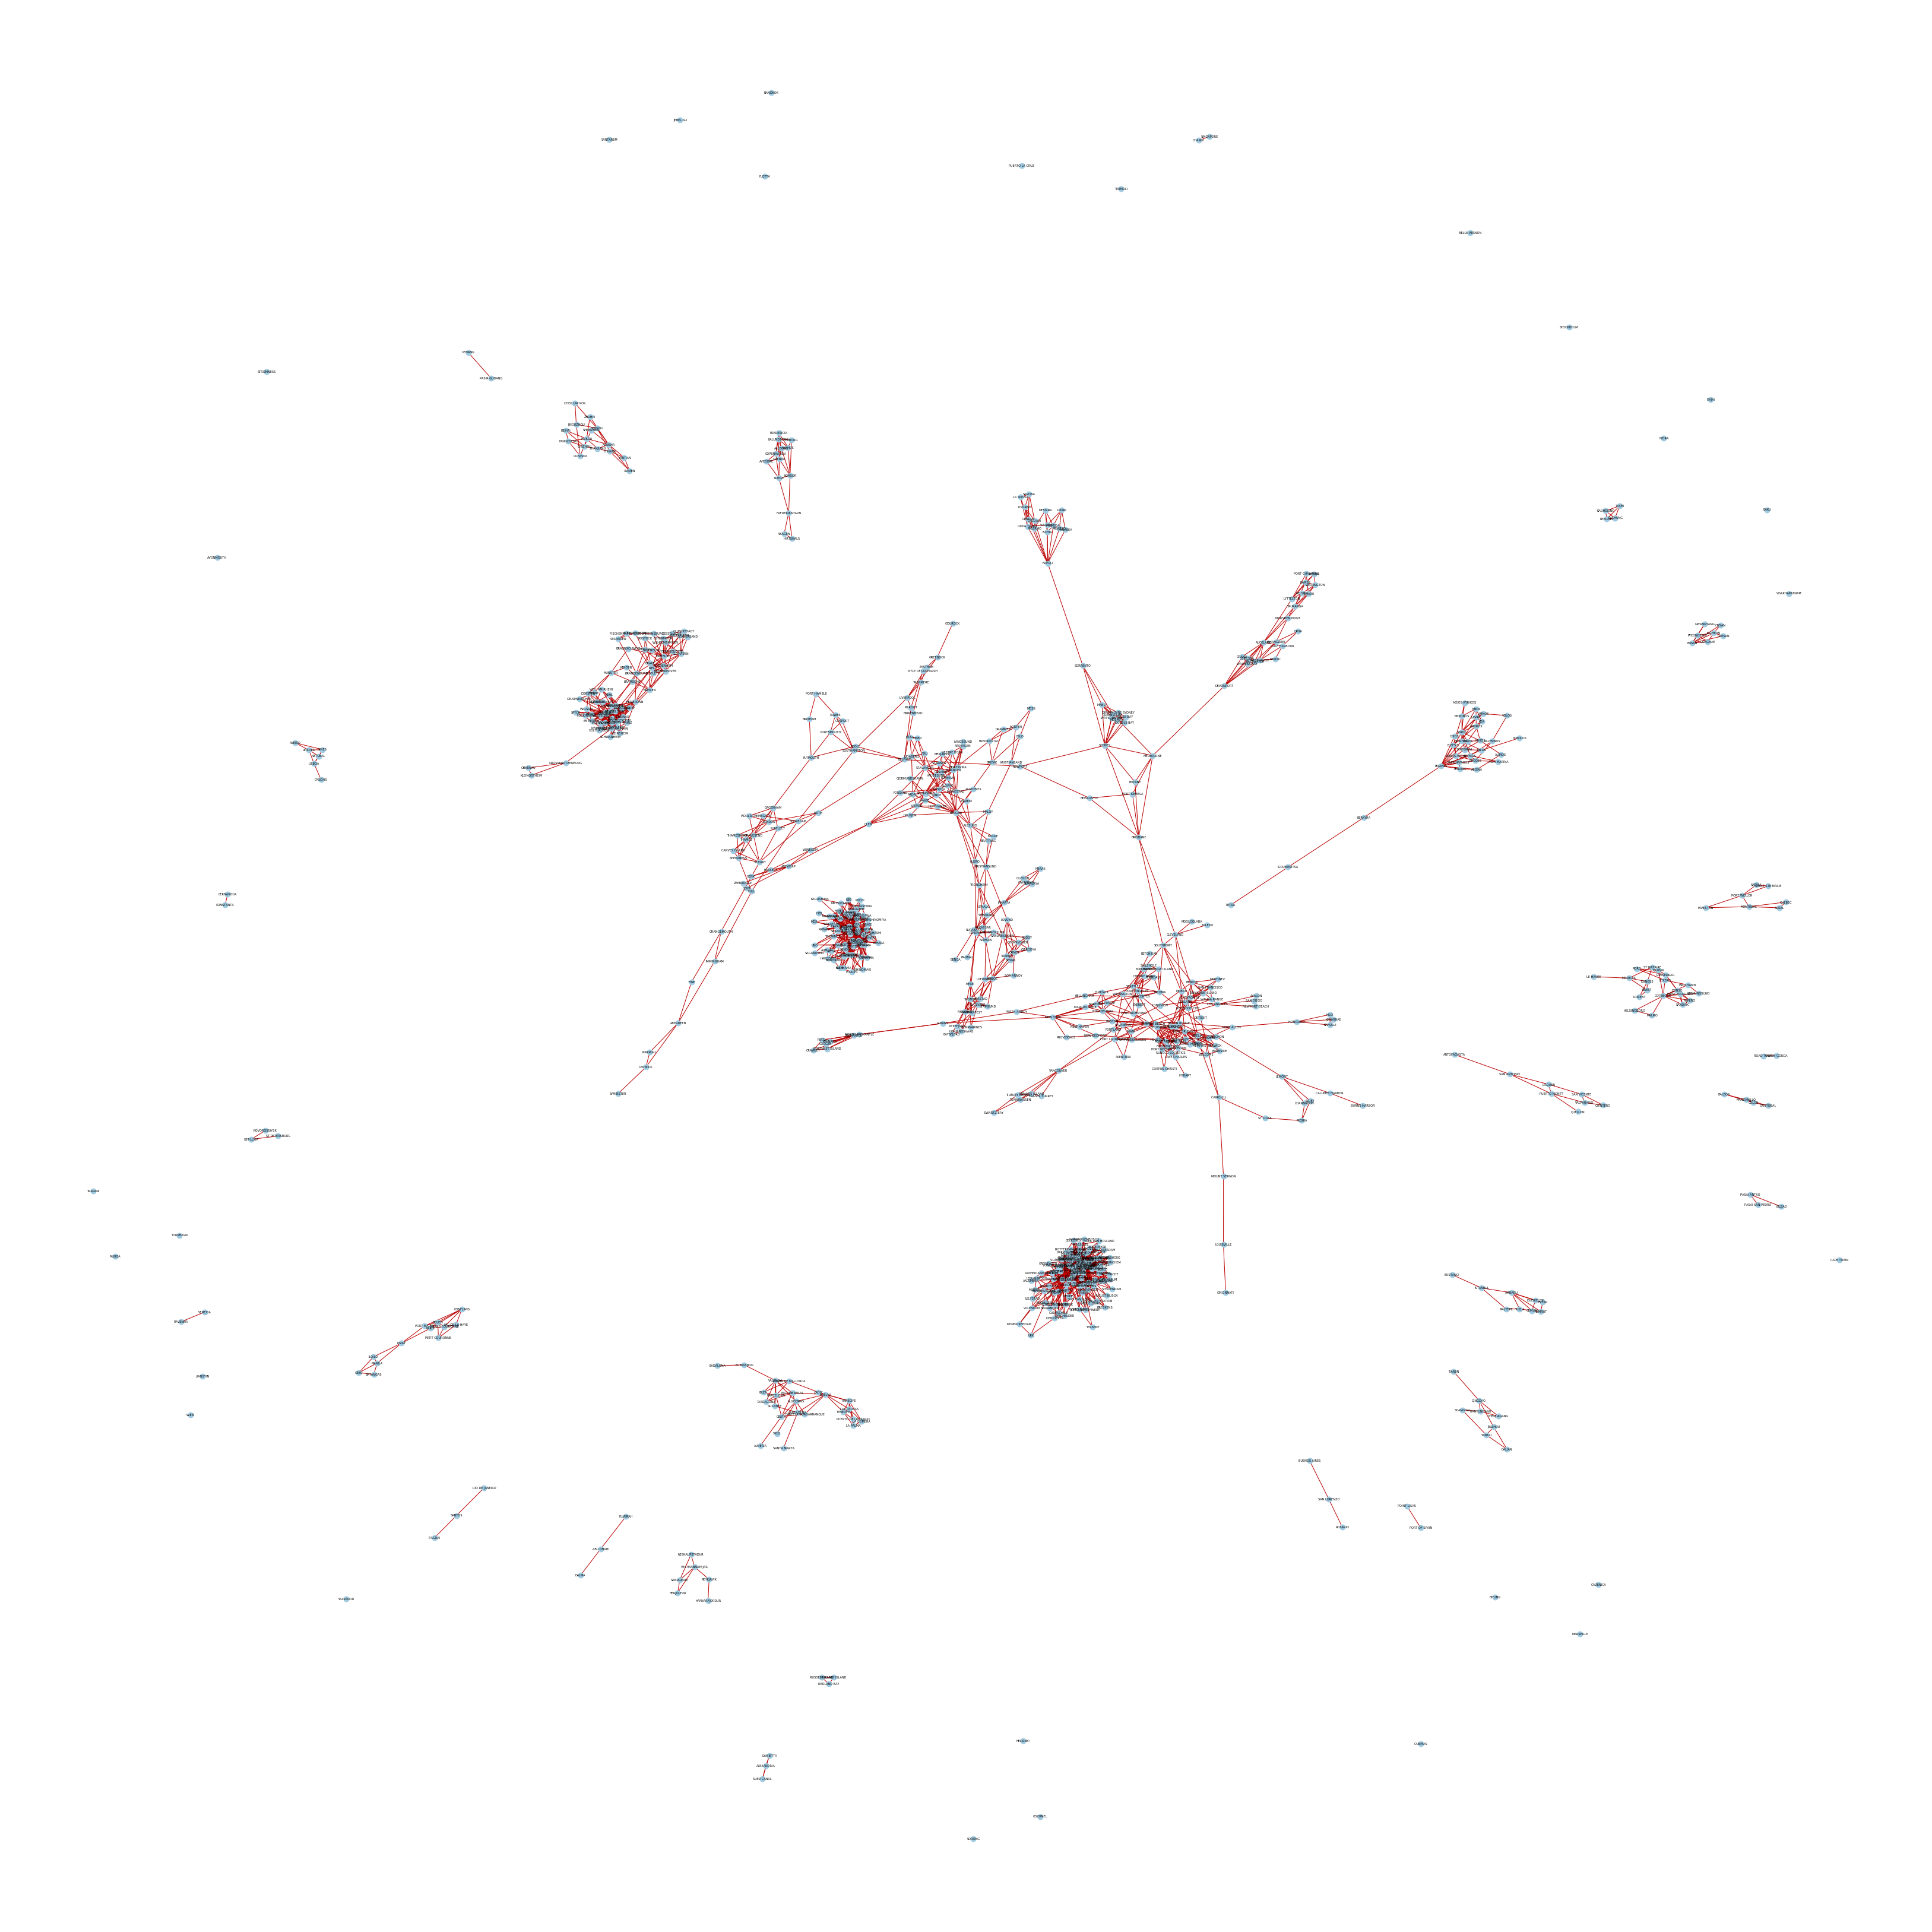

In [83]:
#Filter out nodes with small degree
degree = graph.degree()
to_keep = [n for (n, deg) in degree if deg > 5]
graph_filtered_degree = graph.subgraph(to_keep)

pos=nx.spring_layout(graph_filtered_degree)
plt.figure(1, figsize=(45,45))
nx.draw(graph_filtered_degree,pos,node_color='#A0CBE2',edge_color='#BB0000',width=1,node_size=80,font_size=5,with_labels=True)
plt.savefig("g.pdf")
plt.show() # display